In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import *

In [2]:
#df_test = pd.read_csv("../input/how-much-did-it-rain-ii/test.zip")
df = pd.read_csv("../input/how-much-did-it-rain-ii/train.zip")

In [3]:
def process_data(df):
    df_mean = df.groupby('Id').mean()
    df_mean.fillna(0,inplace=True)
    df_mean.reset_index(inplace=True)
    return df_mean

In [4]:
df_mean = process_data(df)

In [5]:
df_mean['Expected'].describe()

count    1.180945e+06
mean     1.322453e+02
std      6.030804e+02
min      1.000000e-02
25%      2.540001e-01
50%      1.016001e+00
75%      3.810002e+00
max      3.301773e+04
Name: Expected, dtype: float64

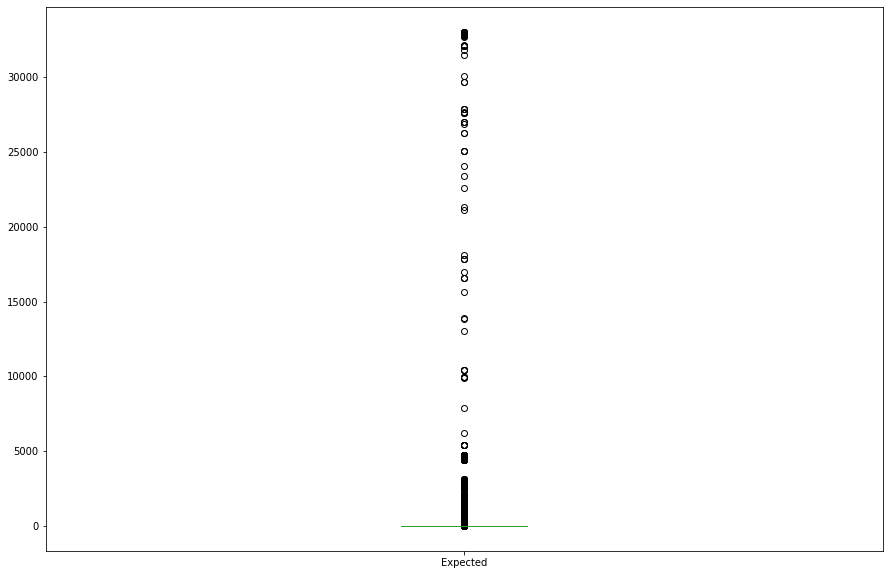

In [6]:
plt.figure(figsize=(15,10))
df_mean['Expected'].plot(kind='box')
plt.show()

In [7]:
df_sample = df_mean.sample(n=100000)

In [8]:
df_sample['Expected']

656026     0.254000
45517      0.254000
986369     0.762000
439510     1.270001
1156571    0.762000
             ...   
435567     4.826003
565974     1.524001
20484      0.508000
41955      1.778001
598339     2.794001
Name: Expected, Length: 100000, dtype: float64

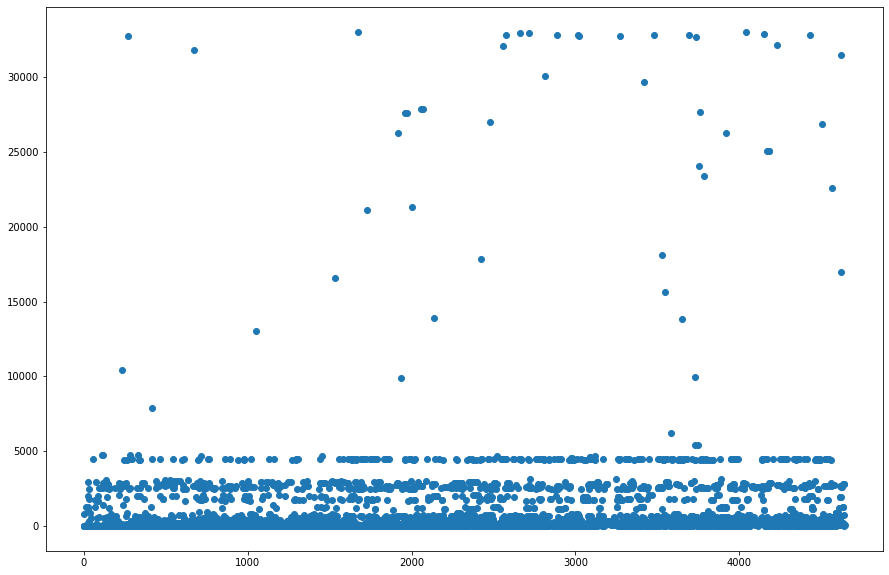

In [9]:
plt.figure(figsize=(15,10))
plt.scatter([x for x in range(len(df_mean['Expected'].unique()))], df_mean['Expected'].unique())
plt.show()

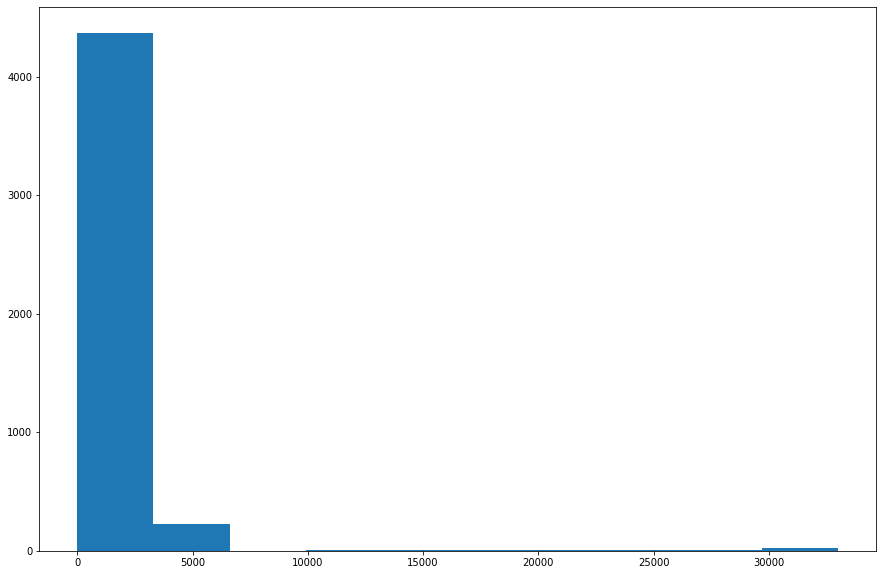

In [10]:
plt.figure(figsize=(15,10))
plt.hist(df_mean['Expected'].unique())
plt.show()

In [11]:
percentileofscore(df_mean['Expected'],df_mean['Expected'].mean())

91.7714203455707

In [12]:
df_mean.drop(df_mean[df_mean['Expected'] > df_mean['Expected'].mean()].index,inplace=True)

In [13]:
df_sample = df_mean.sample(10000)

In [14]:
df_sample.shape

(10000, 24)

In [15]:
features = [f for f in df_sample.columns]
features.remove('Expected')
features.remove('Id')


In [16]:
X = df_sample[features]
y = df_sample['Expected']

In [17]:
scaler = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(scaler.fit_transform(X),y,test_size=0.3,random_state=0)

In [18]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [19]:
LR.score(x_test,y_test)

-0.0021677688534813555

In [20]:
print(mean_squared_error(y_test,LR.predict(x_test)))

148.54467259207794


In [21]:
print(mean_absolute_error(y_test,LR.predict(x_test)))

4.999799662977228


In [22]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
RFR.score(x_test,y_test)

-0.17225531907340552

In [24]:
print(mean_squared_error(y_test,RFR.predict(x_test)))

173.75562054374885


In [25]:
print(mean_absolute_error(y_test,RFR.predict(x_test)))

5.360503250268219


In [26]:
SVM = SVR()
SVM.fit(x_train,y_train)

SVR()

In [27]:
SVM.score(x_test,y_test)

-0.04787212330402424

In [28]:
print(mean_squared_error(y_test,SVM.predict(x_test)))

155.3191255119271


In [29]:
print(mean_absolute_error(y_test,SVM.predict(x_test)))

3.495572813505826


In [30]:
MLP = MLPRegressor(max_iter=1000)
MLP.fit(x_train,y_train)

MLPRegressor(max_iter=1000)

In [31]:
MLP.score(x_test,y_test)

-0.016991469669583203

In [32]:
print(mean_squared_error(y_test,MLP.predict(x_test)))

150.74189131409884


In [33]:
print(mean_absolute_error(y_test,MLP.predict(x_test)))

5.055669817596437


In [34]:
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)

AdaBoostRegressor()

In [35]:
ABR.score(x_test,y_test)

-1.6691802516168095

In [36]:
print(mean_squared_error(y_test,ABR.predict(x_test)))

395.63486163525494


In [37]:
print(mean_absolute_error(y_test,ABR.predict(x_test)))

14.128371146891125


In [38]:
XGB = xgb.XGBRegressor()
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
XGB.score(x_test,y_test)

-0.07300003324444337

In [40]:
print(mean_squared_error(y_test,XGB.predict(x_test)))

159.04366871819389


In [41]:
print(mean_absolute_error(y_test,XGB.predict(x_test)))

5.331446791866796


In [42]:
df_sub = pd.read_csv("../input/how-much-did-it-rain-ii/test.zip")

In [43]:
df_sub_mean = process_data(df_sub)

In [44]:
y_preds = SVM.predict(scaler.fit_transform(df_sub_mean[features]))

In [45]:
sub = pd.DataFrame(columns=['Id','Expected'])

In [46]:
sub['Id'] = df_sub_mean['Id']
sub['Expected'] = y_preds

In [47]:
sub.to_csv('submission.csv',index=False)